Problem Statement- Build a Model to forecast Electric Production

1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"D:\projects\data\timeseries\Electric_Production.csv")

In [3]:
data.head()

,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
data.tail()

,DATE,IPG2211A2N
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


In [5]:
data.shape

(397, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
data["DATE"]=pd.to_datetime(data["DATE"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [9]:
data.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [10]:
data=data.set_index("DATE")

In [11]:
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [12]:
data.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


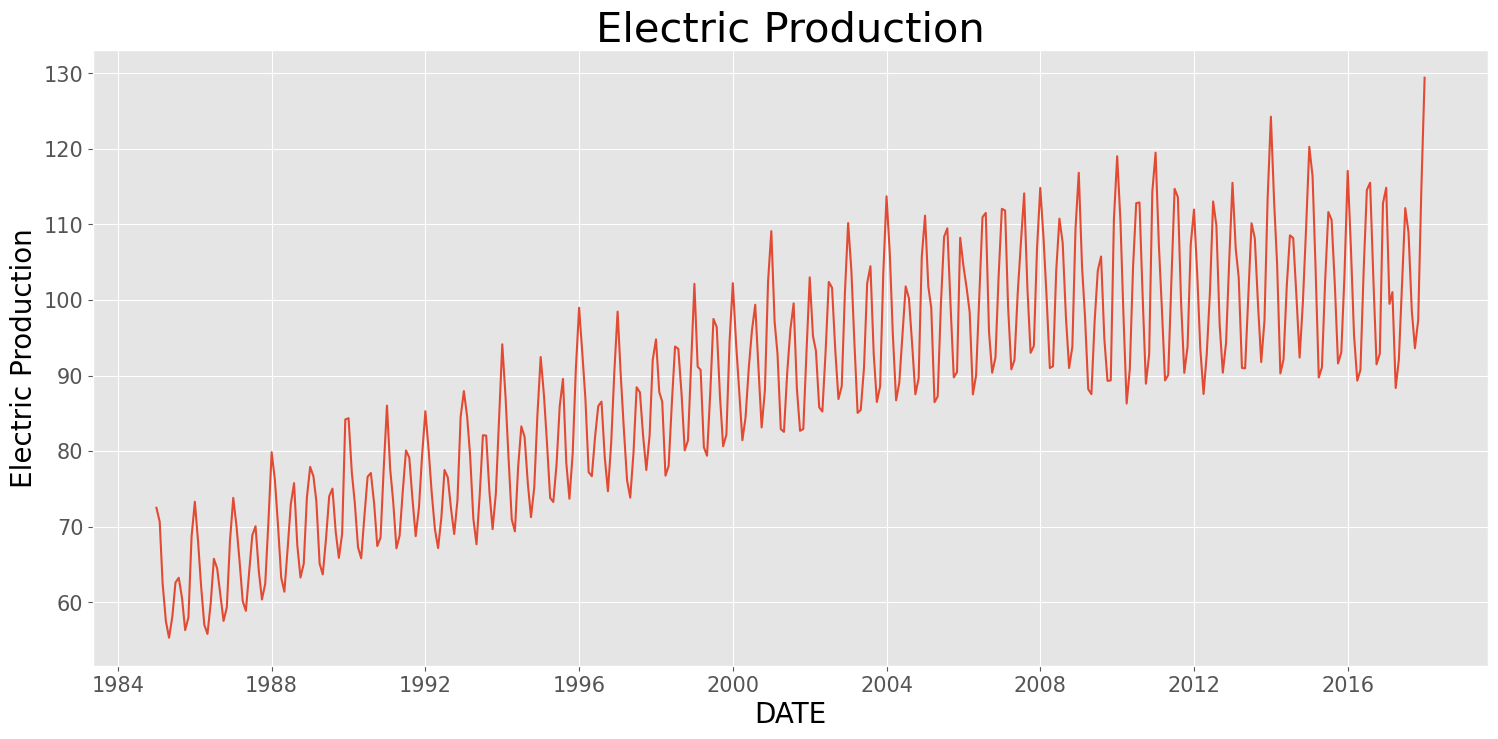

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("DATE",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Electric Production",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(data["IPG2211A2N"])
plt.title("Electric Production",fontsize=30)
plt.show()

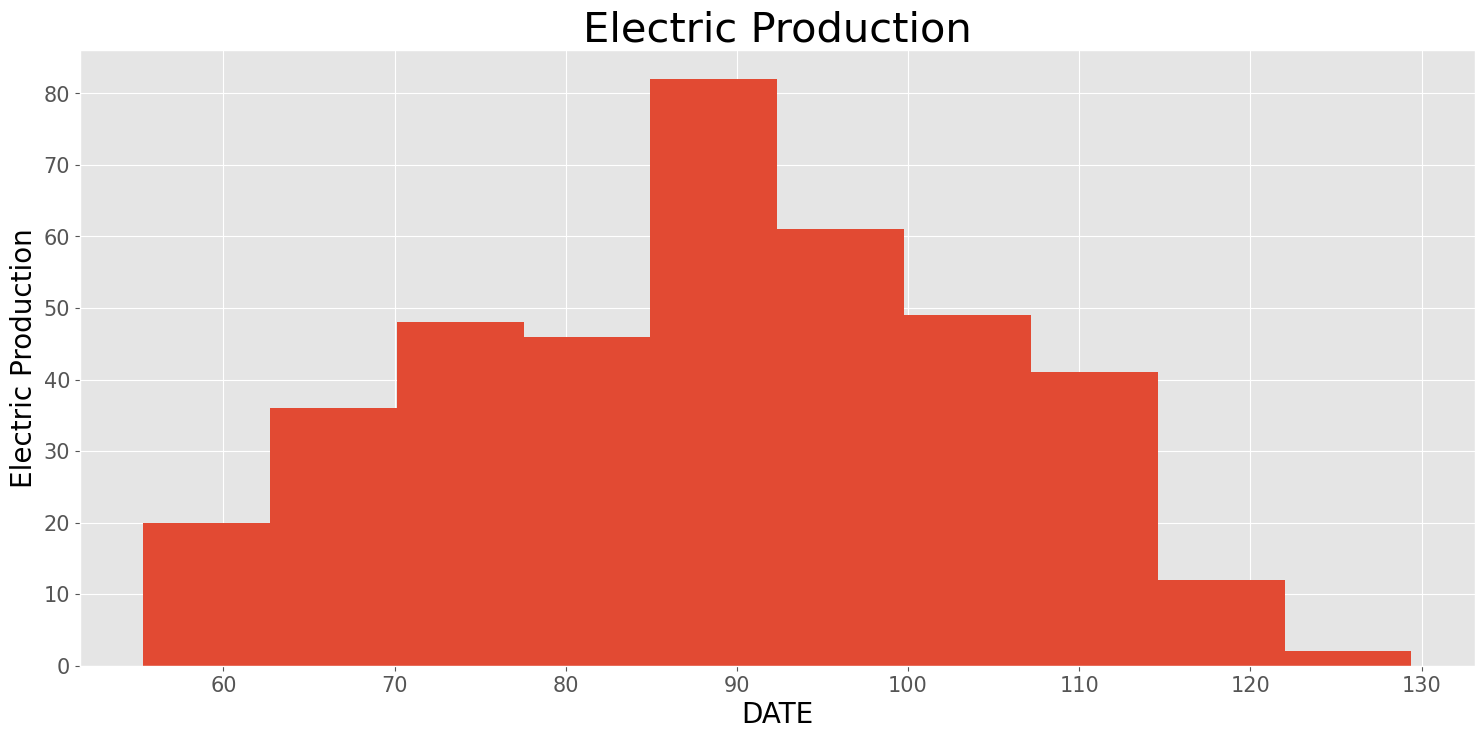

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("DATE",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Electric Production",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(data["IPG2211A2N"])
plt.title("Electric Production",fontsize=30)
plt.show()

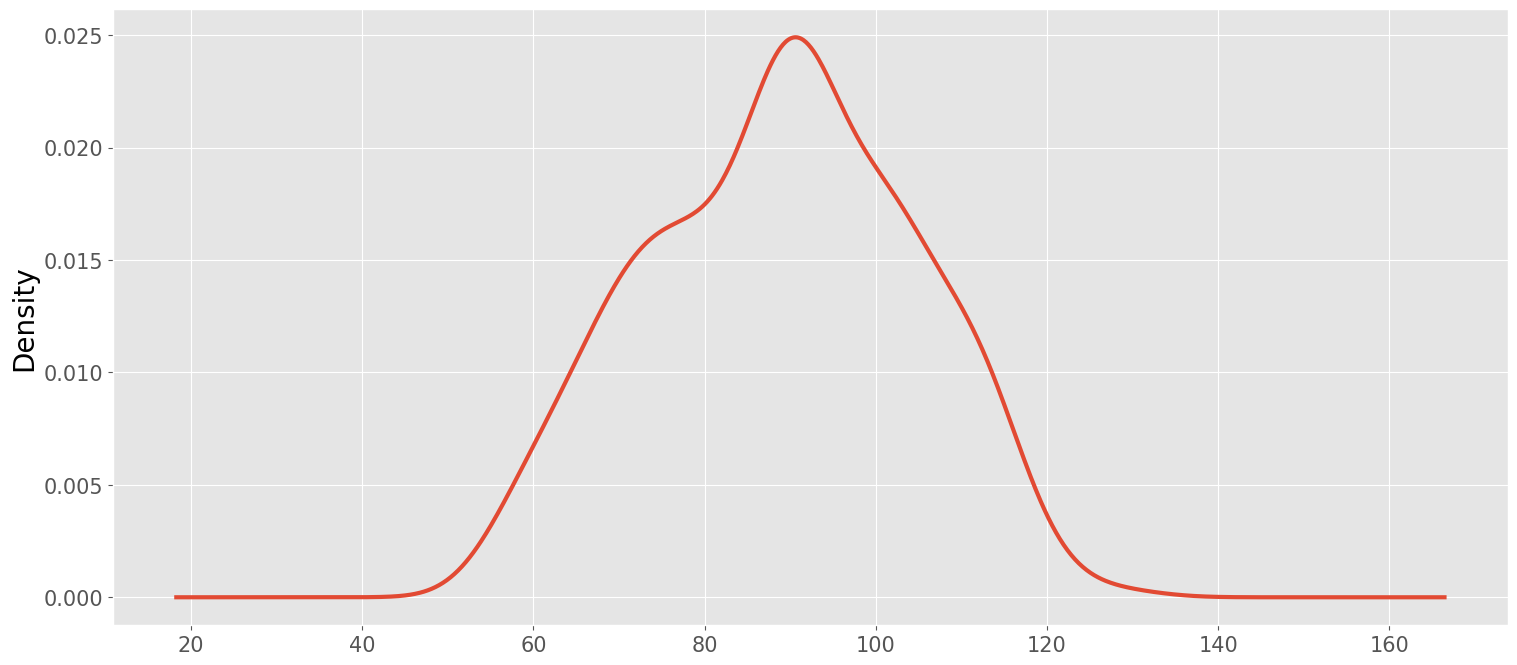

In [15]:
df_IPG2211A2N = data["IPG2211A2N"] 
df_IPG2211A2N.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [16]:
## adfuller is telling the data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller

In [17]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

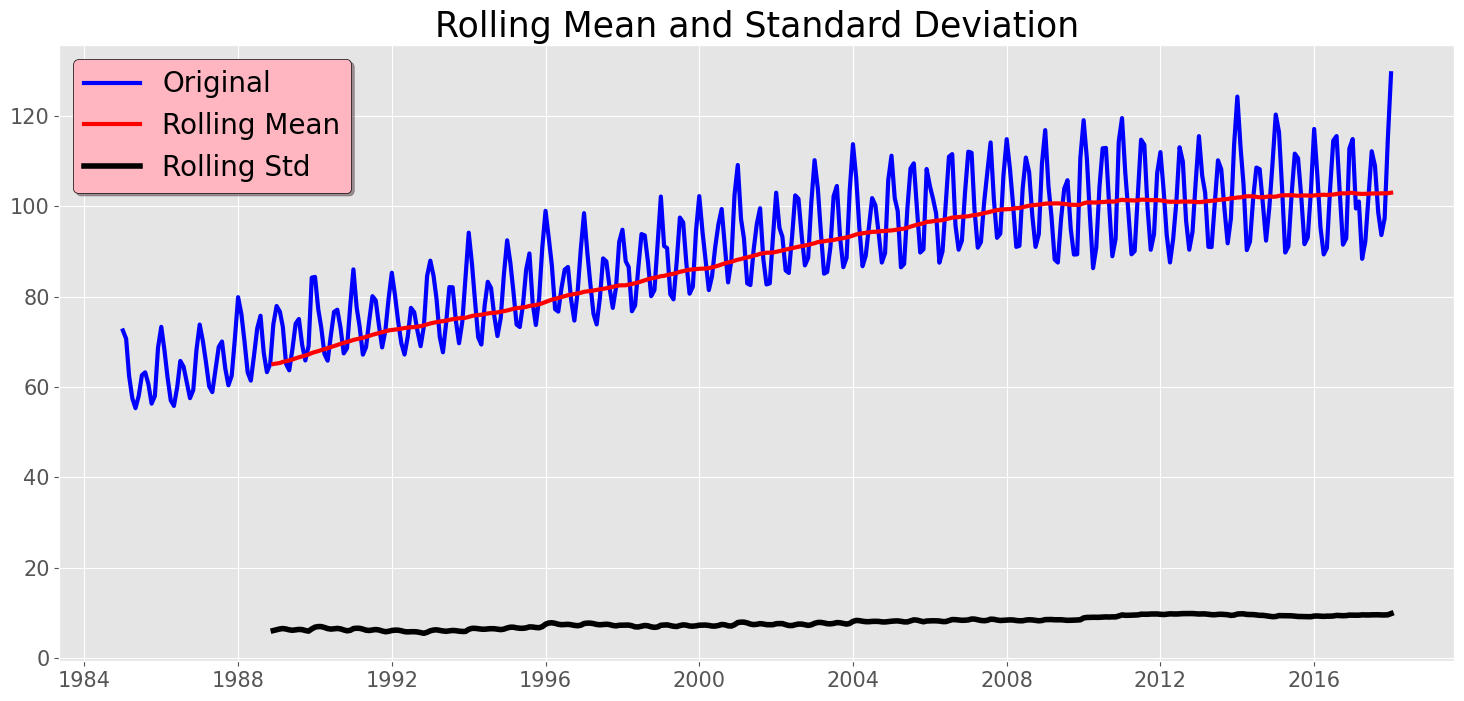

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [18]:
test_stationarity(data.IPG2211A2N)

Null Hypothesis = data is staionary
p-value is greater tham 0.05 that null hypothesis is rejected

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data["IPG2211A2N"],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

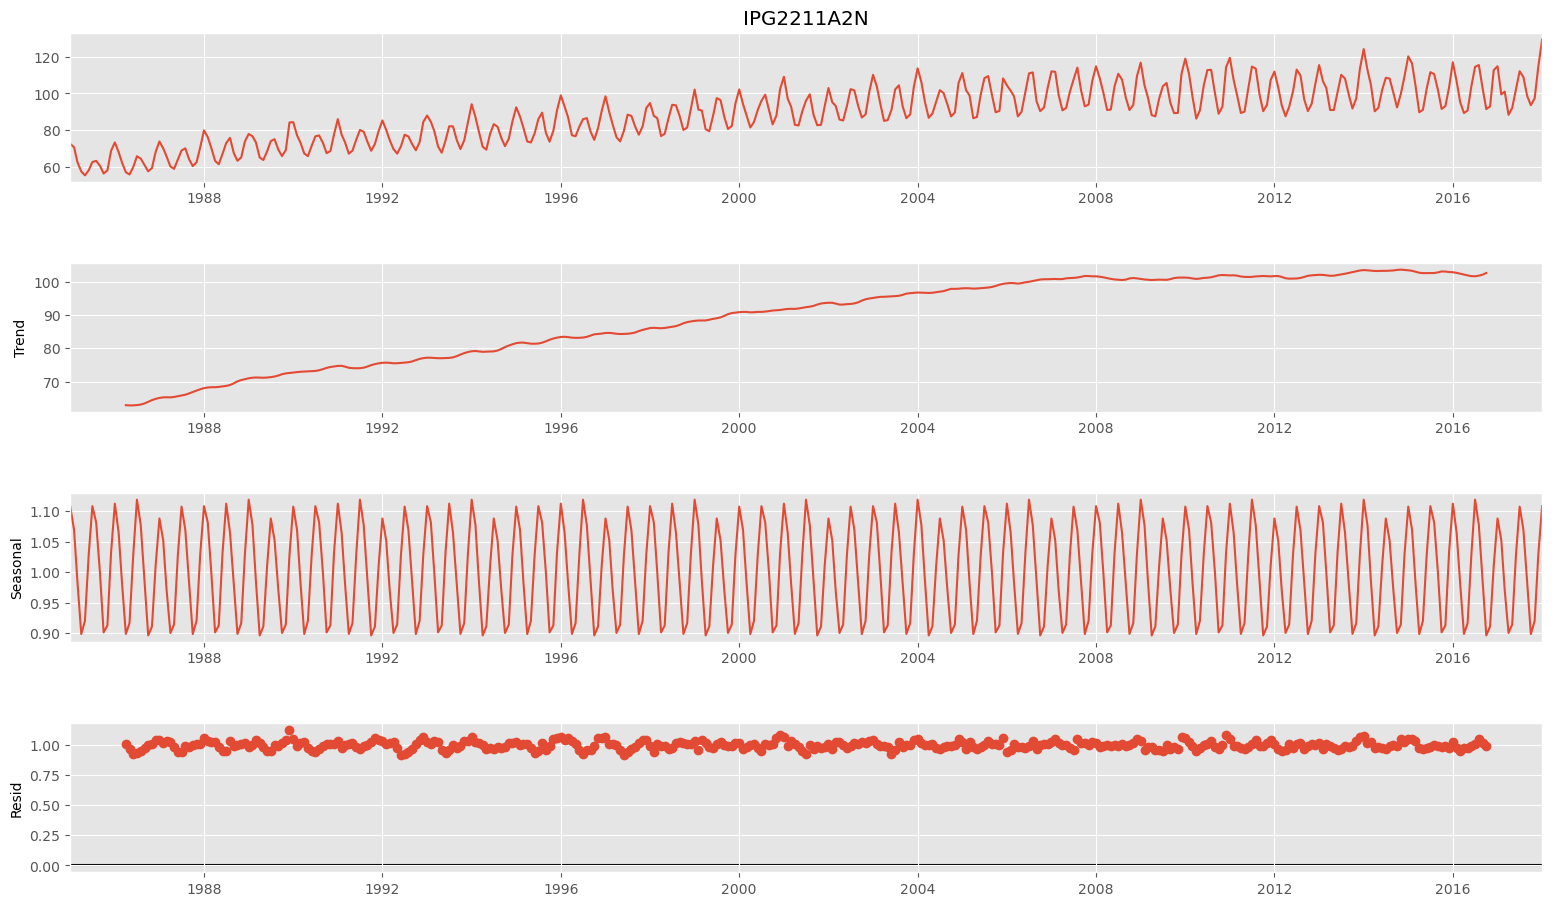

In [20]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [21]:
result.seasonal

DATE
1985-01-01    1.107820
1985-02-01    1.069661
1985-03-01    0.983225
1985-04-01    0.898229
1985-05-01    0.920014
                ...   
2017-09-01    0.983225
2017-10-01    0.898229
2017-11-01    0.920014
2017-12-01    1.029021
2018-01-01    1.108607
Name: seasonal, Length: 397, dtype: float64

In [22]:
result.resid

DATE
1985-01-01   NaN
1985-02-01   NaN
1985-03-01   NaN
1985-04-01   NaN
1985-05-01   NaN
              ..
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
2017-12-01   NaN
2018-01-01   NaN
Name: resid, Length: 397, dtype: float64

In [23]:
result.trend

DATE
1985-01-01   NaN
1985-02-01   NaN
1985-03-01   NaN
1985-04-01   NaN
1985-05-01   NaN
              ..
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
2017-12-01   NaN
2018-01-01   NaN
Name: trend, Length: 397, dtype: float64

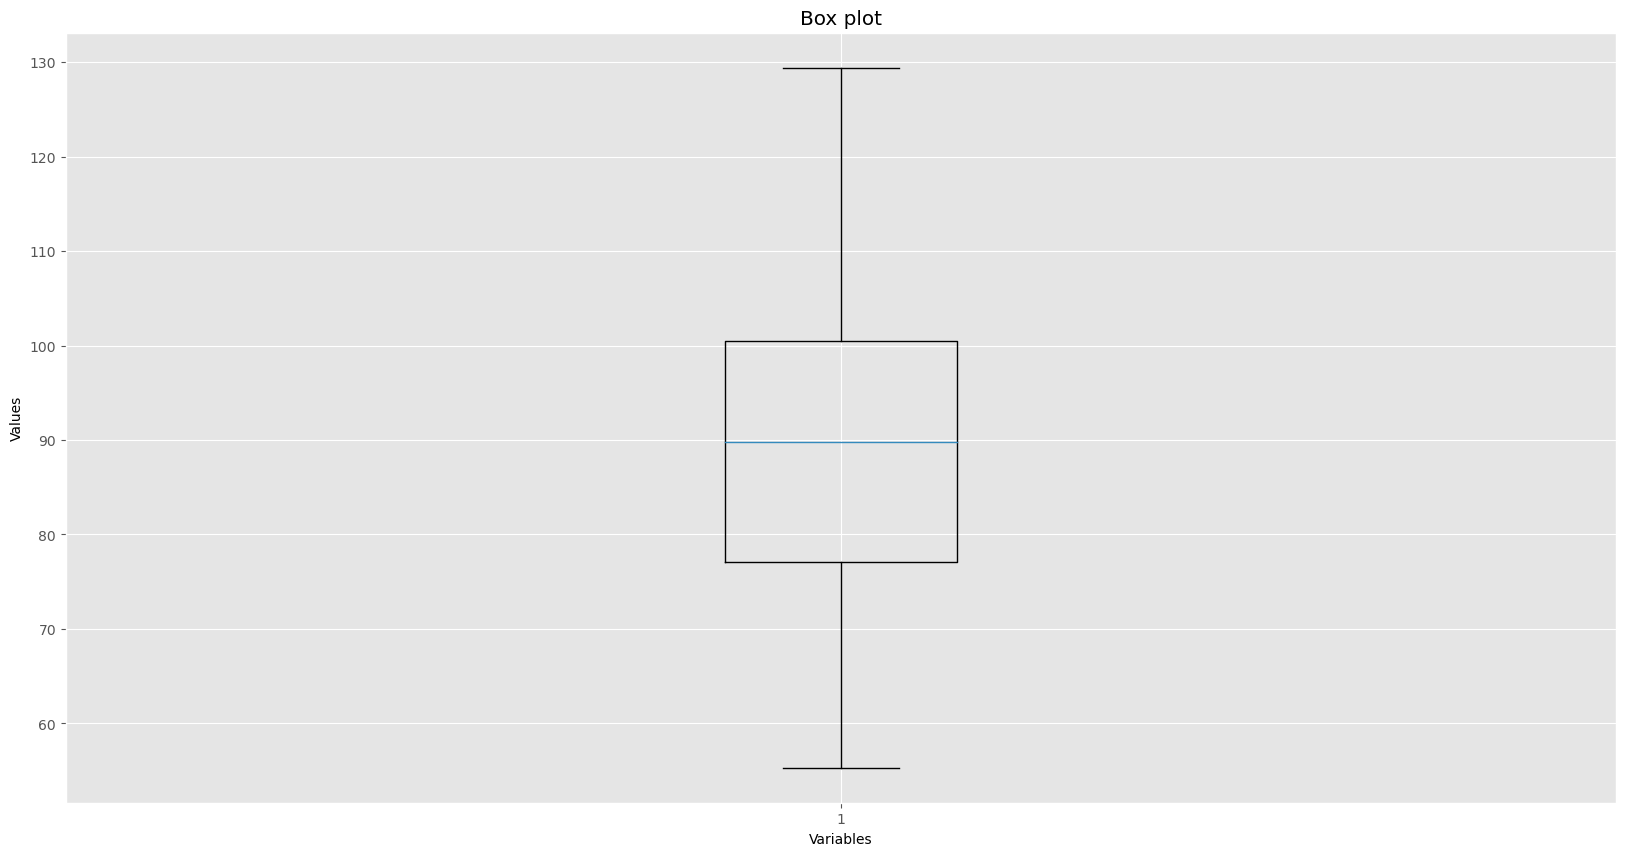

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(data.IPG2211A2N)
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

There is no outlier

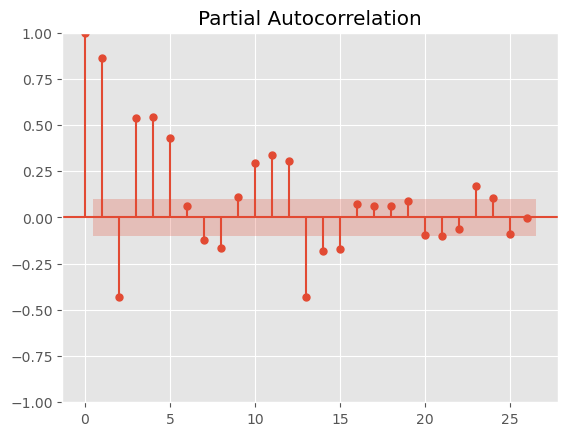

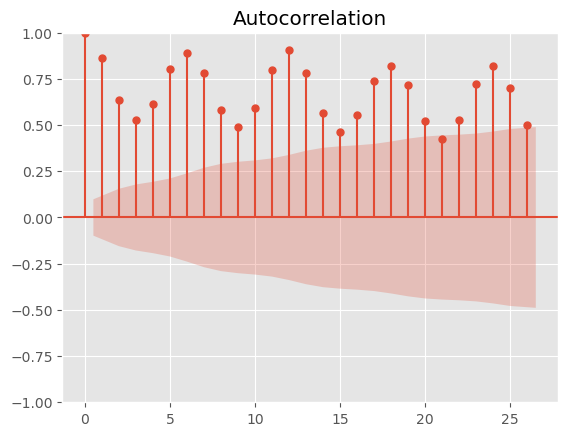

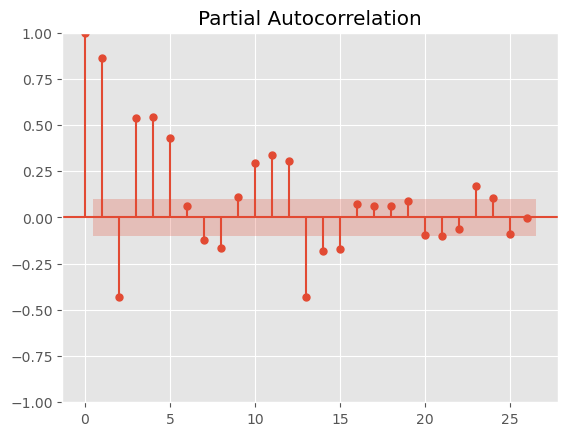

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data.IPG2211A2N)
plot_pacf(data.IPG2211A2N)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [26]:
df_IPG2211A2N=data["IPG2211A2N"]

In [27]:
electric_diff_1=df_IPG2211A2N.diff()

In [28]:
electric_diff_1=electric_diff_1.dropna()

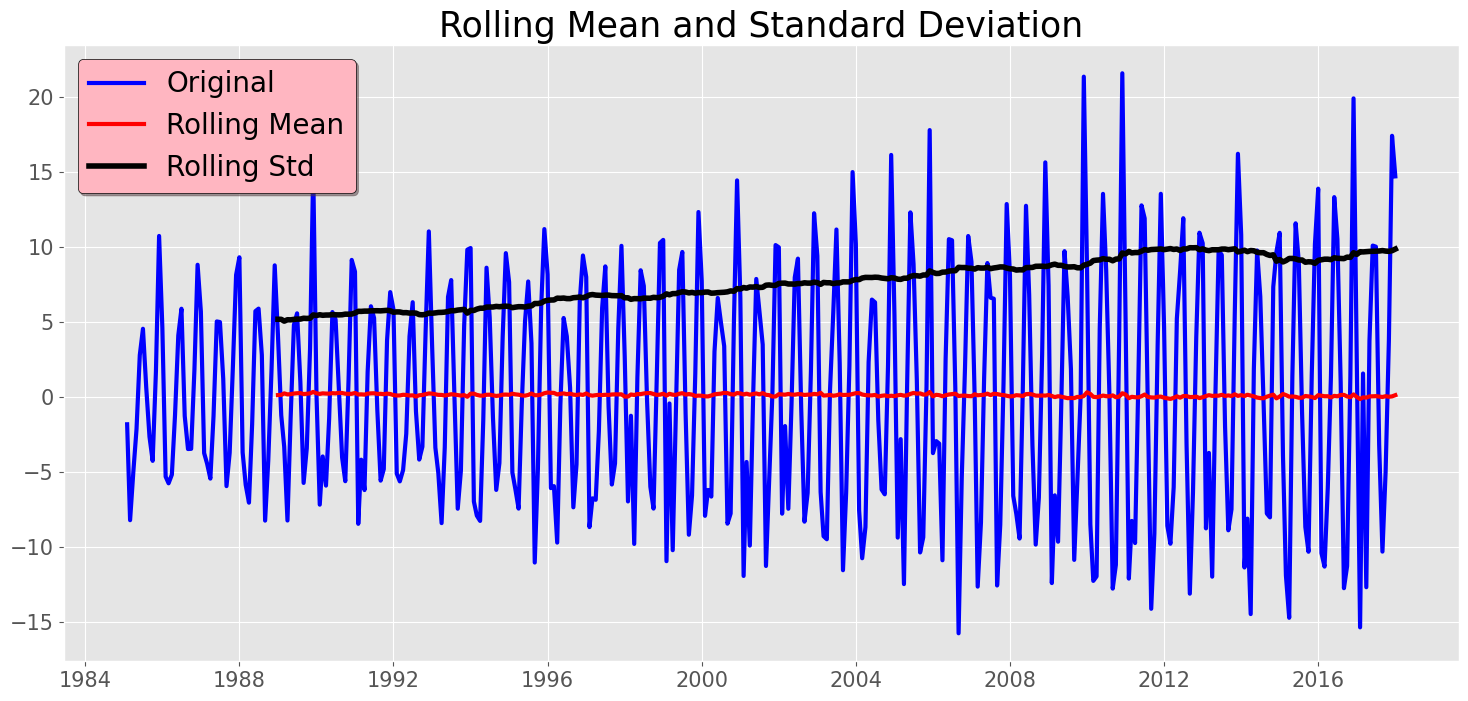

Results of dickey fuller test
Test Statistics               -7.104891e+00
p-value                        4.077787e-10
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [29]:
test_stationarity(electric_diff_1)   #checking data is stationary or not

In [30]:
df_IPG2211A2N.diff(2)

DATE
1985-01-01        NaN
1985-02-01        NaN
1985-03-01   -10.0550
1985-04-01   -13.2006
1985-05-01    -7.1351
               ...   
2017-09-01   -13.5384
2017-10-01   -15.3175
2017-11-01    -1.2795
2017-12-01    21.1075
2018-01-01    32.0689
Name: IPG2211A2N, Length: 397, dtype: float64

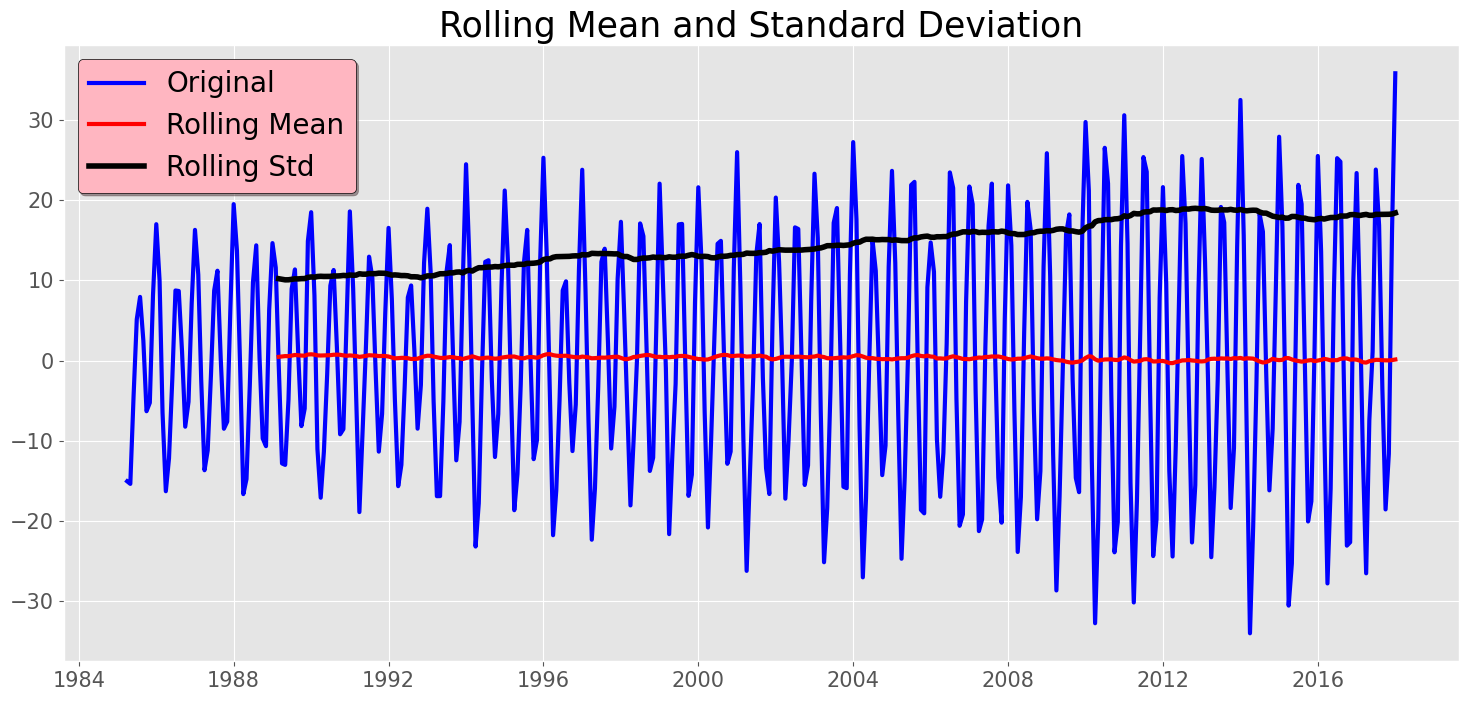

Results of dickey fuller test
Test Statistics               -6.974568e+00
p-value                        8.493857e-10
No. of lags used               1.300000e+01
Number of observations used    3.800000e+02
critical value (1%)           -3.447676e+00
critical value (5%)           -2.869176e+00
critical value (10%)          -2.570838e+00
dtype: float64


In [31]:
tsla_close_diff_3=df_IPG2211A2N.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

Data is stationary

In [32]:
train_data=df_IPG2211A2N[0:-60]
test_data=df_IPG2211A2N[-60:]

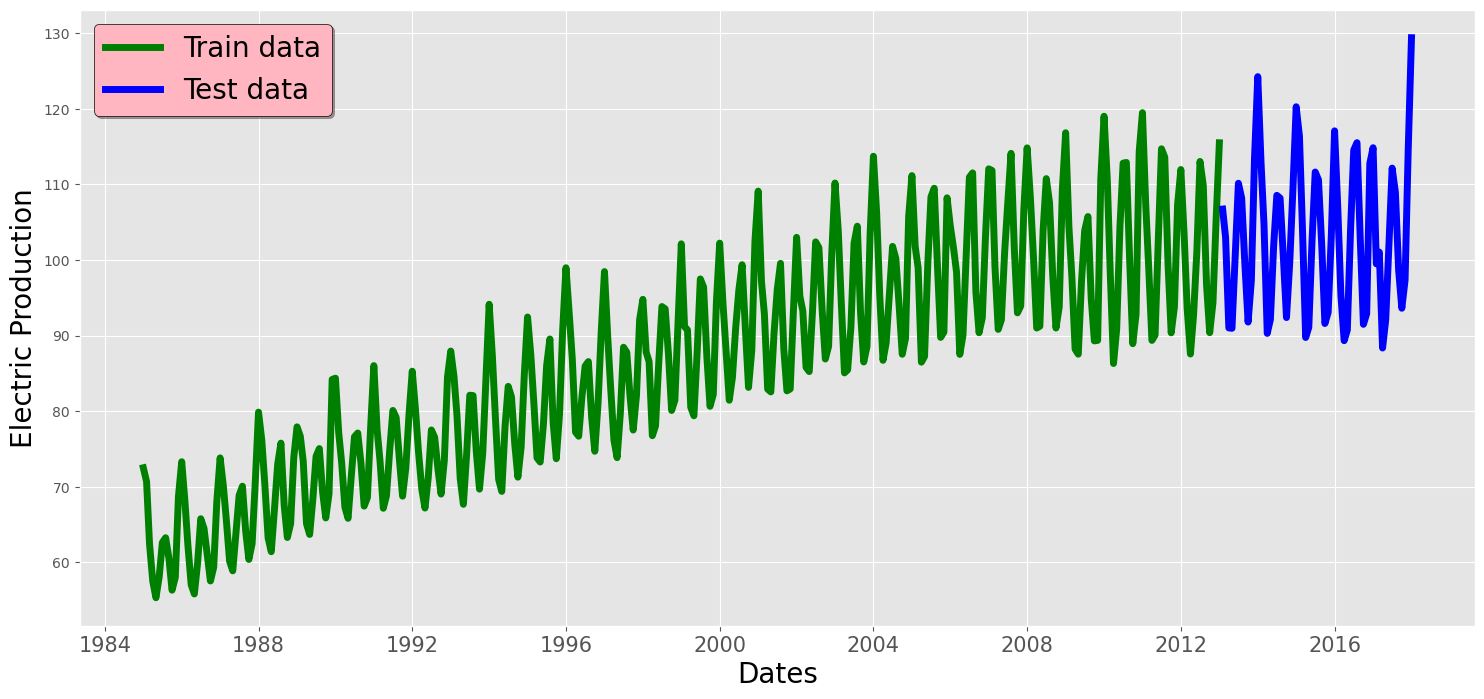

In [33]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Electric Production', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return print("RMSE value of ARIMA model: ",rmse)

In [36]:
train_arima_model(train_data,test_data,(1,1,1))

RMSE value of ARIMA model:  8.528674040458272


In [37]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [46]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

RMSE value of ARIMA model:  18.216253846740535
RMSE value of ARIMA model:  11.498957057618348
RMSE value of ARIMA model:  8.880144571887492
RMSE value of ARIMA model:  9.589658395904314
RMSE value of ARIMA model:  8.531011791718022
RMSE value of ARIMA model:  7.608913962871767
RMSE value of ARIMA model:  10.810574105123637
RMSE value of ARIMA model:  10.856754885099528
RMSE value of ARIMA model:  8.542923896469244
RMSE value of ARIMA model:  9.366184022033043
RMSE value of ARIMA model:  8.14025242080969
RMSE value of ARIMA model:  7.617551801267414
RMSE value of ARIMA model:  8.96917926190273
RMSE value of ARIMA model:  8.528673949212722
RMSE value of ARIMA model:  7.334437264608086
RMSE value of ARIMA model:  10.824321535289005
RMSE value of ARIMA model:  8.875303826056594
RMSE value of ARIMA model:  8.540464581059892
RMSE value of ARIMA model:  8.361955194197241
RMSE value of ARIMA model:  8.00688804934485
RMSE value of ARIMA model:  7.329758874448938
RMSE value of ARIMA model:  7.18

In [39]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [40]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(1,1,1))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05,order=(1,1,1))
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 8.528674040458272


In [41]:
mean_squared_error([test_data[0]],model_fit.forecast())

292.2688457715588

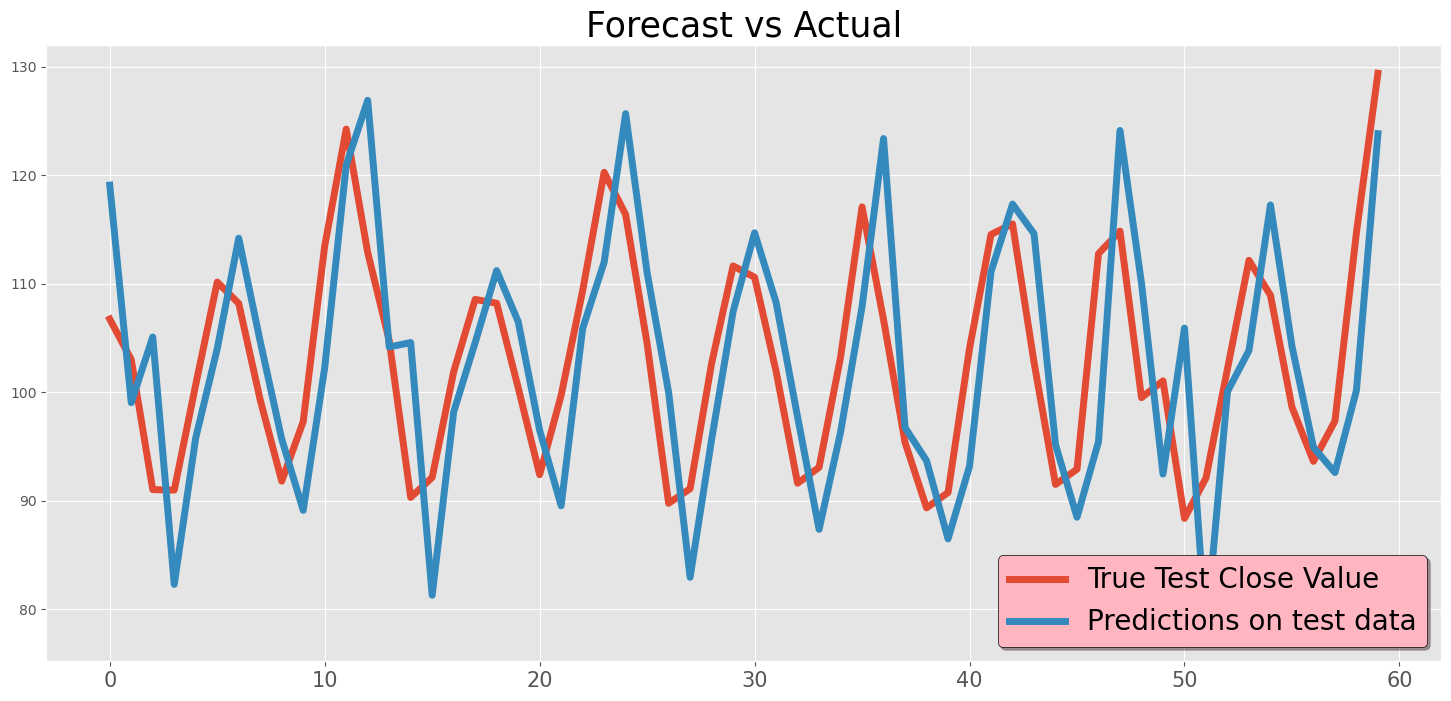

In [42]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

build a model with SARIMAX

In [43]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()

for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(0,1,0),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of SARIMAX Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of SARIMAX Model: 5.573217768422729


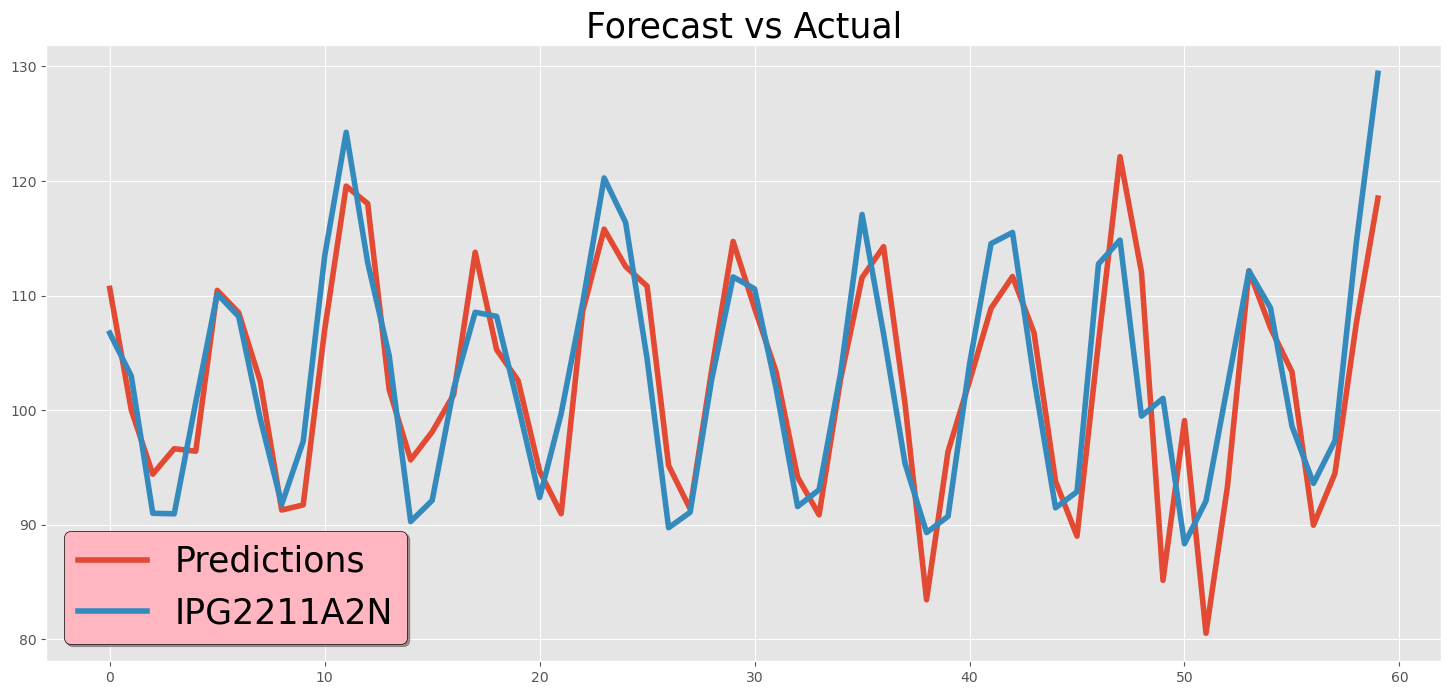

In [44]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'IPG2211A2N', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [45]:
model_fit.predict(start=1,end=len(df_IPG2211A2N)+365)

array([ 72.5052    ,  70.672     ,  98.6995542 ,  55.63856226,
        47.09492471,  53.12708055,  60.75929053,  55.97102395,
        56.4235106 ,  53.33693719,  57.43146214,  71.78961539,
        70.95945777,  59.98482308,  58.4486063 ,  59.76139919,
        62.0069493 ,  63.8817929 ,  64.32312588,  62.10147072,
        56.19604   ,  56.16943819,  63.0489425 ,  71.28073421,
        70.33794356,  64.32029686,  61.53599025,  61.25455161,
        64.2621066 ,  68.86687993,  67.65890854,  67.57088529,
        60.45256105,  57.35118281,  68.71131054,  74.12511664,
        76.56932288,  70.92829834,  63.56829573,  64.70215835,
        67.70123678,  73.8973523 ,  72.63871071,  72.42979326,
        63.52633982,  59.34010067,  72.97889757,  78.22554014,
        75.15437229,  70.52717062,  70.82996258,  64.9746354 ,
        67.72042037,  75.77968336,  73.97191649,  72.40072957,
        65.07804395,  63.85941896,  74.9694813 ,  87.4577291 ,
        80.81339315,  66.27818621,  73.31659799,  72.14